In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import FastICA, PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import time
from scipy import linalg
import matplotlib as mpl
import itertools
from sklearn import random_projection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import LearningCurve, ValidationCurve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
from scipy.stats import kurtosis 
import numpy as np  
import pylab as p



np.random.seed(42)

# Utilities

In [3]:
def load_data(ds):
    df = pd.read_csv("data/" + ds)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    # X, y = X.to_numpy(), y.to_numpy()
    return X, y

# Audit Risk Dataset

## PCA

Kurtosis for normal distribution : -1.8157475339628604


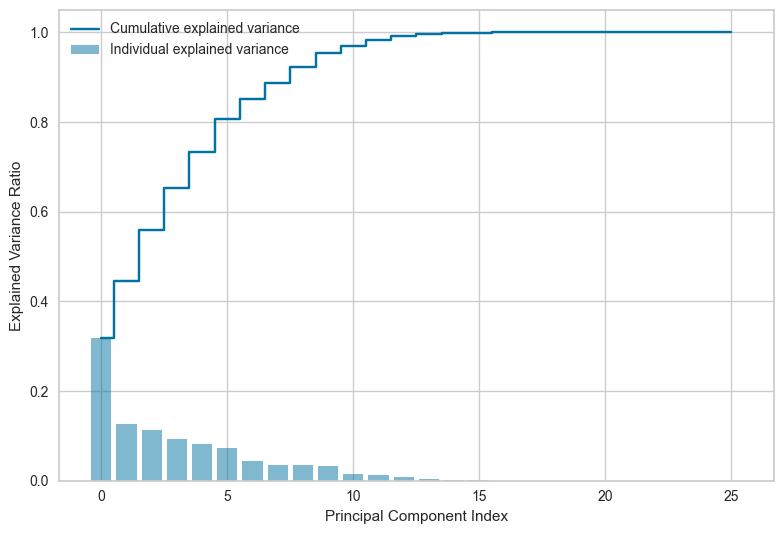

In [4]:
X, y = load_data('audit_risk.csv')
print('Kurtosis for normal distribution :', kurtosis(y)) 

# https://vitalflux.com/pca-explained-variance-concept-python-example/

#
# Scale the dataset; This is very important before you apply PCA
#
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_pca = pca.fit_transform(X_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Best n_components: 9  1.0


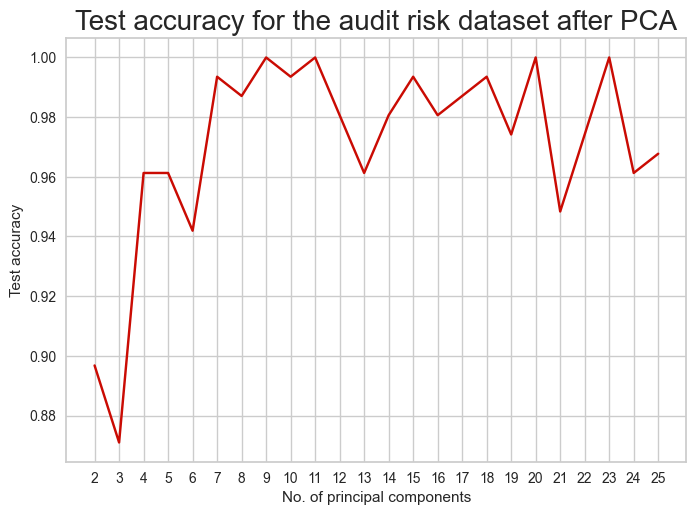

In [7]:
best_n = (0, 0)
test_score = []
for i in range(2, 26):
    pca = PCA(n_components=i, tol=0.1).fit(X)
    X_pca = pca.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if (score > best_n[1]):
        best_n = (i, score)

    test_score.append(score)

print("Best n_components: " + str(best_n[0]) + "  " + str(best_n[1]))

plt.plot(range(2, 26), test_score, color='r')
plt.title("Test accuracy for the audit risk dataset after PCA", fontsize=20)
plt.xticks(range(2, 26))
plt.xlabel("No. of principal components".format("Test"))
plt.ylabel("Test accuracy")
# plt.legend(loc = "best")
plt.show()    

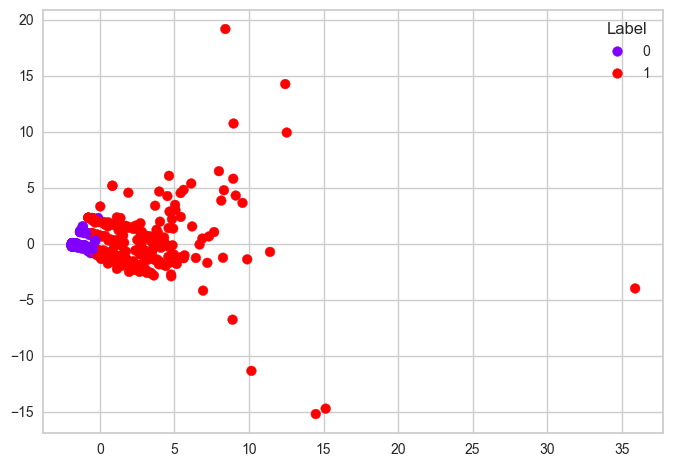

In [21]:
from sklearn.pipeline import Pipeline
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], cmap = 'rainbow', c=y)
legend = plt.legend(*plot.legend_elements(),
                    loc="upper right", title="Label")
plt.show()

## ICA

In [22]:
X, y = load_data('audit_risk.csv')

C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Us

Best n_components: 10  0.9806451612903225


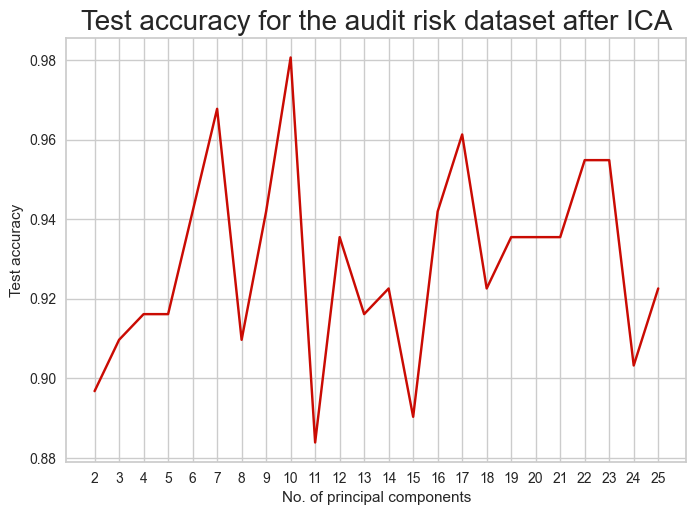

In [9]:
best_n = (0, 0)
test_score = []
for i in range(2, 26):
    ica = FastICA(n_components=i, tol=0.1).fit(X)
    X_ica = ica.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if (score > best_n[1]):
        best_n = (i, score)

    test_score.append(score)

print("Best n_components: " + str(best_n[0]) + "  " + str(best_n[1]))

plt.plot(range(2, 26), test_score, color='r')
plt.title("Test accuracy for the audit risk dataset after ICA", fontsize=20)
plt.xticks(range(2, 26))
plt.xlabel("No. of principal components".format("Test"))
plt.ylabel("Test accuracy")
# plt.legend(loc = "best")
plt.show()    

C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


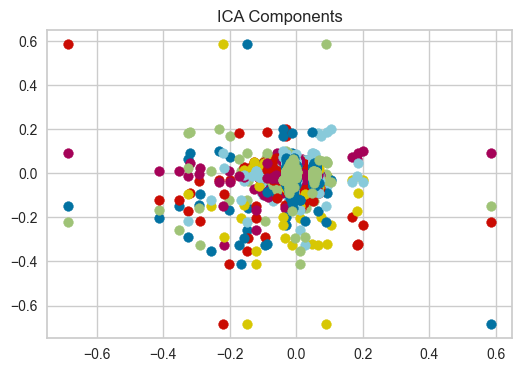

In [26]:
n = 5
ica = FastICA(n_components=n, max_iter=10000, tol=0.1) 
X_ica=ica.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('ICA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_ica[:,i], X_ica[:,j])

## Randomized Projections

In [27]:
X, y = load_data('audit_risk.csv')

Best n_components: 9  1.0


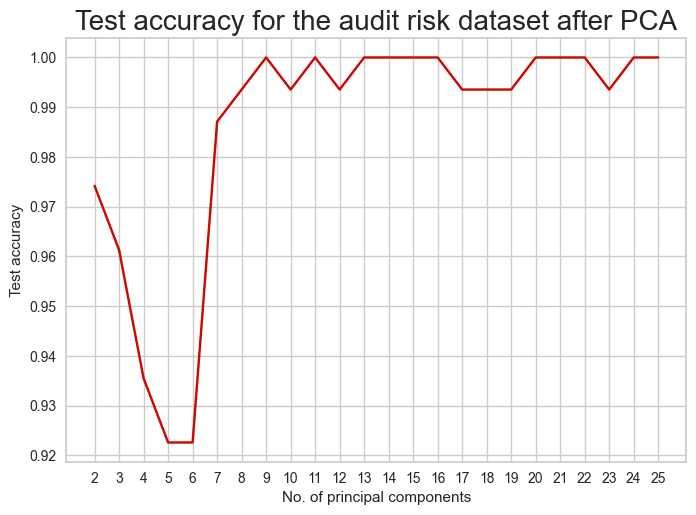

In [11]:
best_n = (0, 0)
test_score = []
for i in range(2, 26):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=42).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if (score > best_n[1]):
        best_n = (i, score)

    test_score.append(score)

print("Best n_components: " + str(best_n[0]) + "  " + str(best_n[1]))

plt.plot(range(2, 26), test_score, color='r')
plt.title("Test accuracy for the audit risk dataset after PCA", fontsize=20)
plt.xticks(range(2, 26))
plt.xlabel("No. of principal components".format("Test"))
plt.ylabel("Test accuracy")
# plt.legend(loc = "best")
plt.show()    

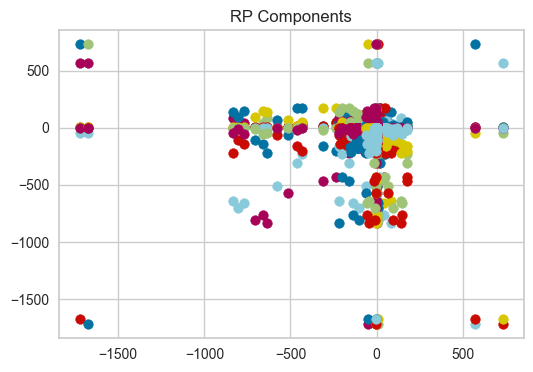

In [29]:
n = 9
rp = random_projection.SparseRandomProjection(n_components=n)
X_rp=rp.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

## SVD

5

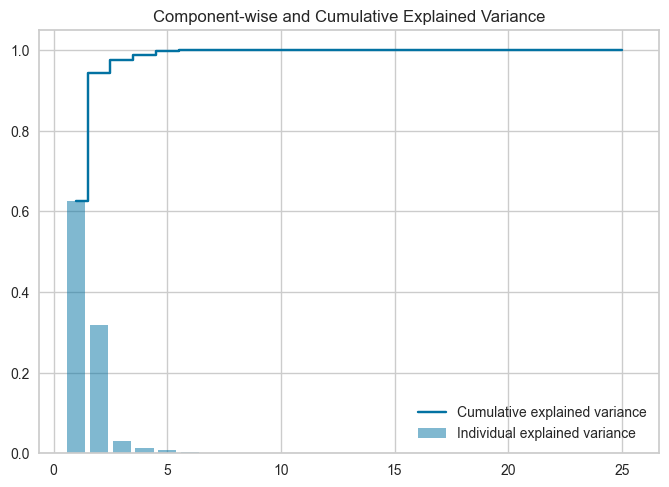

In [31]:
X, y = load_data('audit_risk.csv')
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

tsvd_var_ratios = tsvd.explained_variance_ratio_
# plt.plot(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios)
# plt.plot(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios))
plt.bar(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios), where='mid',label='Cumulative explained variance')
plt.title("Component-wise and Cumulative Explained Variance")
plt.legend(loc='best')

# https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(tsvd_var_ratios, 0.99)


Best n_components: 21  1.0


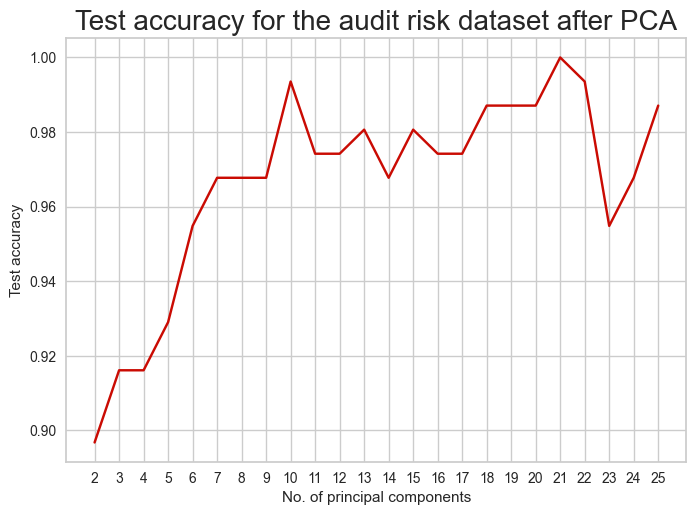

In [12]:
best_n = (0, 0)
test_score = []
for i in range(2, 26):
    svd = TruncatedSVD(n_components=i).fit(X)
    X_svd = svd.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if (score > best_n[1]):
        best_n = (i, score)

    test_score.append(score)

print("Best n_components: " + str(best_n[0]) + "  " + str(best_n[1]))

plt.plot(range(2, 26), test_score, color='r')
plt.title("Test accuracy for the audit risk dataset after PCA", fontsize=20)
plt.xticks(range(2, 26))
plt.xlabel("No. of principal components".format("Test"))
plt.ylabel("Test accuracy")
# plt.legend(loc = "best")
plt.show()    

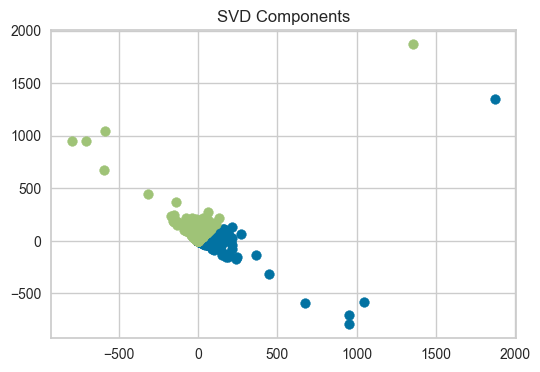

In [33]:
n = 2
svd = TruncatedSVD(n_components=n)
X_svd=svd.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('SVD Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_svd[:,i], X_svd[:,j])

# Bank Personal Loan Dataset

## PCA

Kurtosis for normal distribution : -1.1822088608814625


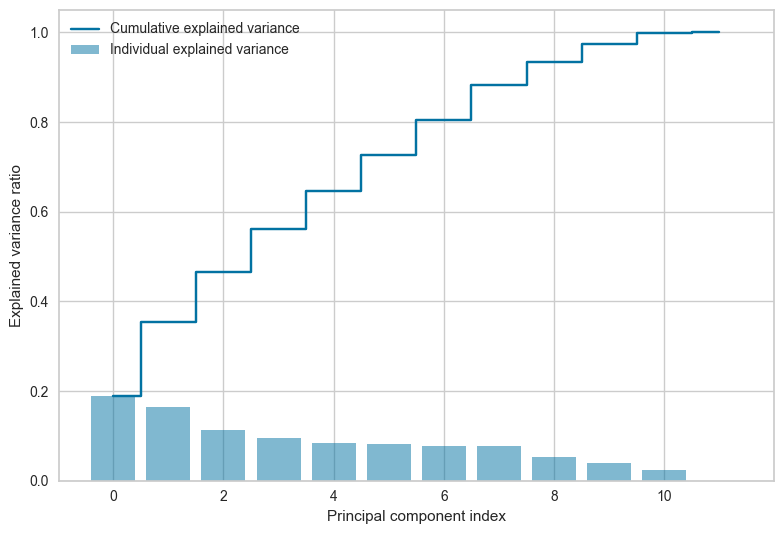

In [14]:
X, y = load_data('bank_personal_loan_modelling.csv')

print('Kurtosis for normal distribution :', kurtosis(y)) 

# https://vitalflux.com/pca-explained-variance-concept-python-example/

#
# Scale the dataset; This is very important before you apply PCA
#
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_pca = pca.fit_transform(X_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
start = time.time()
pca = PCA(n_components= 8).fit(X)
print("Time(s) " + str(time.time() - start))
print("original shape:", X.shape)
X_pca = pca.transform(X)
print("transformed shape:", X_pca.shape)
print()

Time(s) 0.0184781551361084
original shape: (5000, 12)
transformed shape: (5000, 8)



Best n_components: 10  0.72


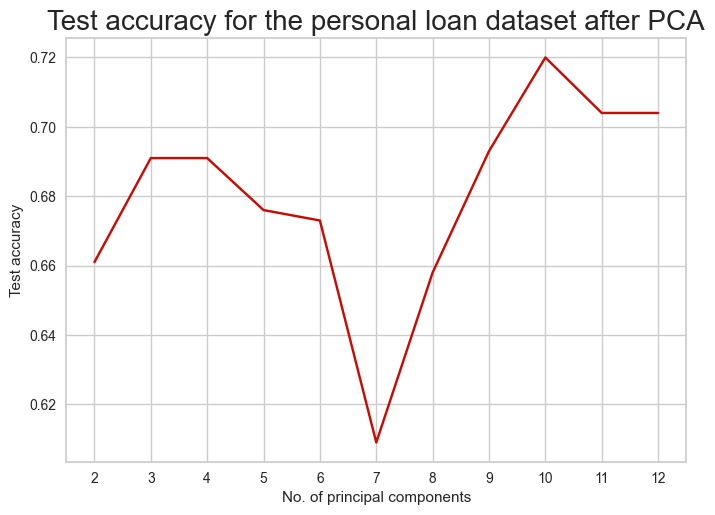

In [24]:
best_n = (0, 0)
test_score = []
for i in range(2, 13):
    pca = PCA(n_components=i, tol=0.1).fit(X)
    X_pca = pca.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 13, min_samples_leaf = 3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if (score > best_n[1]):
        best_n = (i, score)

    test_score.append(score)

print("Best n_components: " + str(best_n[0]) + "  " + str(best_n[1]))

plt.plot(range(2, 13), test_score, color='r')
plt.title("Test accuracy for the personal loan dataset after PCA", fontsize=20)
plt.xticks(range(2, 13))
plt.xlabel("No. of principal components".format("Test"))
plt.ylabel("Test accuracy")
# plt.legend(loc = "best")
plt.show()    

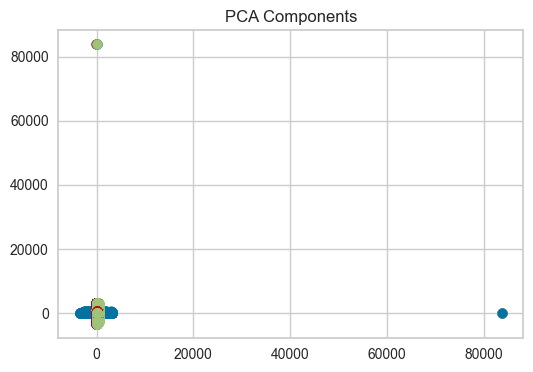

In [37]:
n = 8
pca = PCA(n_components=n) 
X_pca=pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('PCA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_pca[:,i], X_pca[:,j])

## ICA

C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Us

Best n_components: 11  0.726


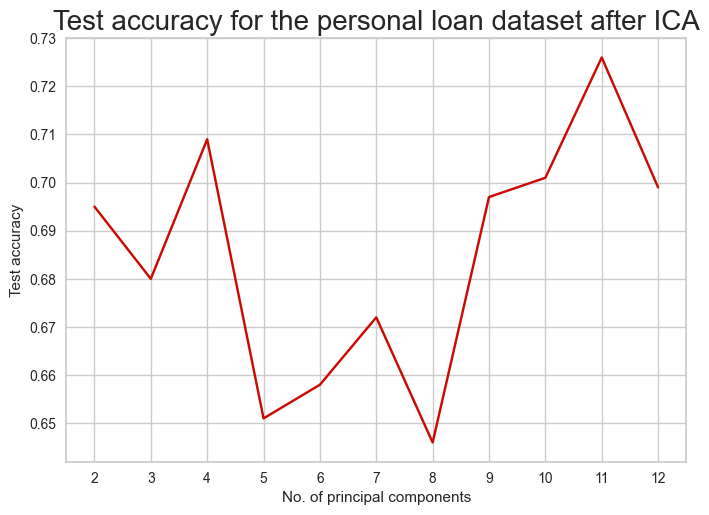

In [23]:
best_n = (0, 0)
test_score = []
for i in range(2, 13):
    ica = FastICA(n_components=i, tol=0.1).fit(X)
    X_ica = ica.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 13, min_samples_leaf = 3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if (score > best_n[1]):
        best_n = (i, score)

    test_score.append(score)

print("Best n_components: " + str(best_n[0]) + "  " + str(best_n[1]))

plt.plot(range(2, 13), test_score, color='r')
plt.title("Test accuracy for the personal loan dataset after ICA", fontsize=20)
plt.xticks(range(2, 13))
plt.xlabel("No. of principal components".format("Test"))
plt.ylabel("Test accuracy")
# plt.legend(loc = "best")
plt.show()    

C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


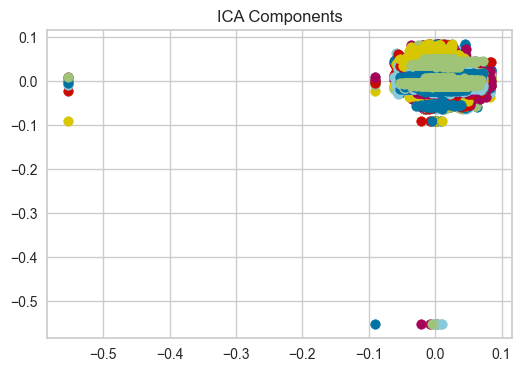

In [39]:
n = 11
ica = FastICA(n_components=n, max_iter=10000, tol=0.1) 
X_ica=ica.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('ICA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_ica[:,i], X_ica[:,j])

## Randomized Projections

Best n_components: 6  0.729


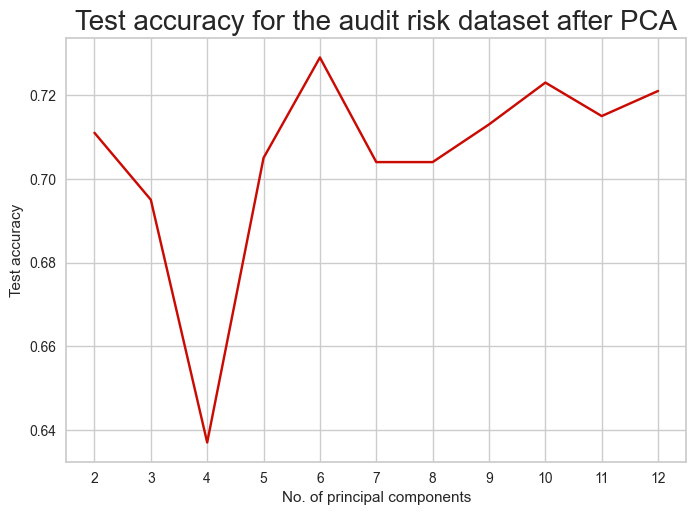

In [25]:
X, y = load_data('bank_personal_loan_modelling.csv')

best_n = (0, 0)
test_score = []
for i in range(2, 13):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=42).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 13, min_samples_leaf = 3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if (score > best_n[1]):
        best_n = (i, score)

    test_score.append(score)

print("Best n_components: " + str(best_n[0]) + "  " + str(best_n[1]))

plt.plot(range(2, 13), test_score, color='r')
plt.title("Test accuracy for the audit risk dataset after PCA", fontsize=20)
plt.xticks(range(2, 13))
plt.xlabel("No. of principal components".format("Test"))
plt.ylabel("Test accuracy")
# plt.legend(loc = "best")
plt.show()    

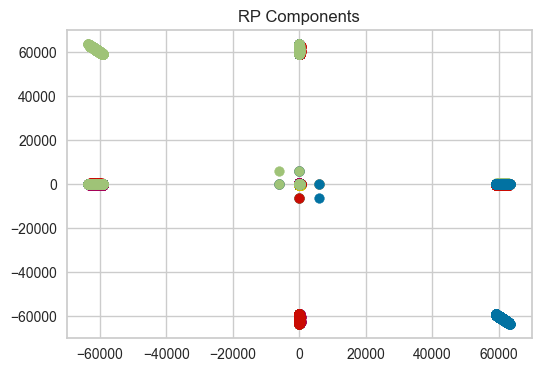

In [41]:
n = 8
rp = random_projection.SparseRandomProjection(n_components=n)
X_rp=rp.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

## SVD

1

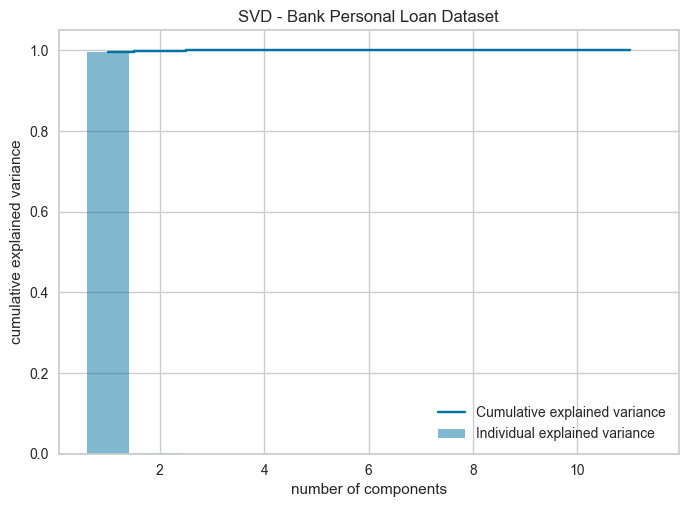

In [30]:
X, y = load_data('bank_personal_loan_modelling.csv')
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

tsvd_var_ratios = tsvd.explained_variance_ratio_
plt.bar(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios), where='mid',label='Cumulative explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("SVD - Bank Personal Loan Dataset")
plt.legend(loc='best')

# https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(tsvd_var_ratios, 0.99)

Best n_components: 12  0.712


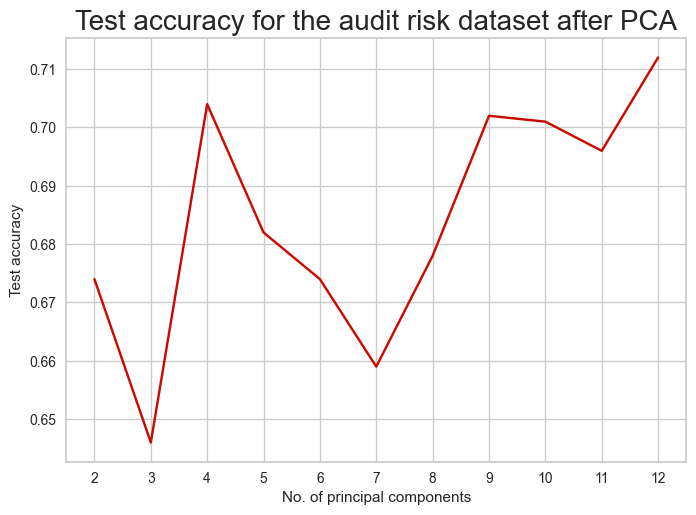

In [26]:
best_n = (0, 0)
test_score = []
for i in range(2, 13):
    svd = TruncatedSVD(n_components=i).fit(X)
    X_svd = svd.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 13, min_samples_leaf = 3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if (score > best_n[1]):
        best_n = (i, score)

    test_score.append(score)

print("Best n_components: " + str(best_n[0]) + "  " + str(best_n[1]))

plt.plot(range(2, 13), test_score, color='r')
plt.title("Test accuracy for the audit risk dataset after PCA", fontsize=20)
plt.xticks(range(2, 13))
plt.xlabel("No. of principal components".format("Test"))
plt.ylabel("Test accuracy")
# plt.legend(loc = "best")
plt.show()    

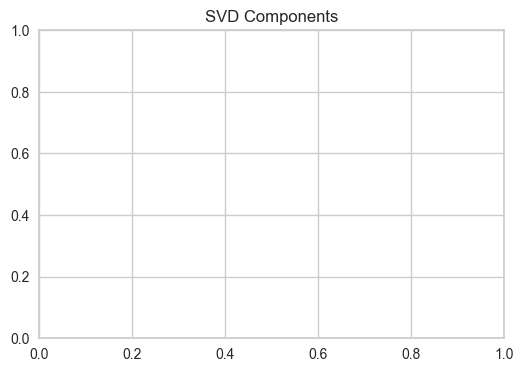

In [44]:
n = 1
svd = TruncatedSVD(n_components=n)
X_svd=svd.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('SVD Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_svd[:,i], X_svd[:,j])

In [36]:
df = pd.read_csv("data/audit_risk.csv")
X, y = df.iloc[:, :-1], df.iloc[:, -1]

ica = FastICA(n_components=26, tol=0.1).fit(X)
X_ica = ica.fit_transform(X)

for n in range(26):
    A = X_ica[ : , n]

    print(kurtosis(A))


-1.2791431136857296
48.521355317448226
97.90405136302262
63.36988942353648
275.39230966904876
49.05380967287504
4.491799119311822
104.30398557063943
60.901159423386275
655.1614431140589
122.87053992142388
27.54998545857928
59.622448261723946
11.827325181651238
0.41091618668677876
303.92432172739643
68.06873387859571
17.645408731428
4.159697531851576
267.4379895121572
245.66498786243739
-1.2322891236740845
2.8111954419969214
143.51930816748484
-1.1809079337608352
11.104285005293512


C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\chang\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
